In [258]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_confusion_matrix


In [259]:
df = pd.read_csv('./input/loans.csv')

#loan_data['issue_date'] = pd.to_datetime(loan_data['issue_date'], format = '%b-%y')
#loan_data['earliest_credit_line'] = pd.to_datetime(loan_data['earliest_credit_line'], format = '%b-%y')

#Create Target Variable
df['Is_Good'] = np.where(df['loan_status'].isin(['Charged Off', 'Default',                                                       
                                                       'Late (> 90 days)']), 0, 1)
# We create a new variable that has the value of '0' if a condition is met, and the value of '1' if it is not met. Create a scorce Card

# Drop irrelevant columns
df.drop(['account_id', 'postcode_district','title'], axis=1, inplace=True)


C:\Users\edwin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [260]:
region_dict = [
    {"County":"Guernsey","Region":"CrownDependencies"},
    {"County":"IOM","Region":"CrownDependencies"},
    {"County":"Jersey","Region":"CrownDependencies"},
    {"County":"NorthEastDerbyshire","Region":"EastMidlands"},
    {"County":"AmberValley","Region":"EastMidlands"},
    {"County":"Ashfield","Region":"EastMidlands"},
    {"County":"Bassetlaw","Region":"EastMidlands"},
    {"County":"Blaby","Region":"EastMidlands"},
    {"County":"Bolsover","Region":"EastMidlands"},
    {"County":"Boston","Region":"EastMidlands"},
    {"County":"Broxtowe","Region":"EastMidlands"},
    {"County":"Charnwood","Region":"EastMidlands"},
    {"County":"Chesterfield","Region":"EastMidlands"},
    {"County":"Corby","Region":"EastMidlands"},
    {"County":"Daventry","Region":"EastMidlands"},
    {"County":"Derby","Region":"EastMidlands"},
    {"County":"Derbyshire","Region":"EastMidlands"},
    {"County":"Derbyshire","Region":"EastMidlands"},
    {"County":"DerbyshireDales","Region":"EastMidlands"},
    {"County":"EastLindsey","Region":"EastMidlands"},
    {"County":"EastNorthamptonshire","Region":"EastMidlands"},
    {"County":"Erewash","Region":"EastMidlands"},
    {"County":"Gedling","Region":"EastMidlands"},
    {"County":"Harborough","Region":"EastMidlands"},
    {"County":"HighPeak","Region":"EastMidlands"},
    {"County":"HinckleyandBosworth","Region":"EastMidlands"},
    {"County":"Kettering","Region":"EastMidlands"},
    {"County":"Leicester","Region":"EastMidlands"},
    {"County":"Leicestershire","Region":"EastMidlands"},
    {"County":"Leicestershire","Region":"EastMidlands"},
    {"County":"Lincoln","Region":"EastMidlands"},
    {"County":"Lincolnshire","Region":"EastMidlands"},
    {"County":"Lincolnshire","Region":"EastMidlands"},
    {"County":"Mansfield","Region":"EastMidlands"},
    {"County":"Melton","Region":"EastMidlands"},
    {"County":"NewarkandSherwood","Region":"EastMidlands"},
    {"County":"NorthKesteven","Region":"EastMidlands"},
    {"County":"NorthWestLeicestershire","Region":"EastMidlands"},
    {"County":"Northampton","Region":"EastMidlands"},
    {"County":"Northamptonshire","Region":"EastMidlands"},
    {"County":"Nottingham","Region":"EastMidlands"},
    {"County":"Nottinghamshire","Region":"EastMidlands"},
    {"County":"Nottinghamshire","Region":"EastMidlands"},
    {"County":"OadbyandWigston","Region":"EastMidlands"},
    {"County":"Rushcliffe","Region":"EastMidlands"},
    {"County":"Rutland","Region":"EastMidlands"},
    {"County":"SouthDerbyshire","Region":"EastMidlands"},
    {"County":"SouthHolland","Region":"EastMidlands"},
    {"County":"SouthKesteven","Region":"EastMidlands"},
    {"County":"SouthNorthamptonshire","Region":"EastMidlands"},
    {"County":"Wellingborough","Region":"EastMidlands"},
    {"County":"WestLindsey","Region":"EastMidlands"},
    {"County":"Babergh","Region":"EastofEngland"},
    {"County":"Basildon","Region":"EastofEngland"},
    {"County":"Bedford","Region":"EastofEngland"},
    {"County":"BedfordBorough","Region":"EastofEngland"},
    {"County":"Bedfordshire","Region":"EastofEngland"},
    {"County":"Braintree","Region":"EastofEngland"},
    {"County":"Breckland","Region":"EastofEngland"},
    {"County":"Brentwood","Region":"EastofEngland"},
    {"County":"Broadland","Region":"EastofEngland"},
    {"County":"Broxbourne","Region":"EastofEngland"},
    {"County":"Cambridge","Region":"EastofEngland"},
    {"County":"Cambridgeshire","Region":"EastofEngland"},
    {"County":"Cambridgeshire","Region":"EastofEngland"},
    {"County":"CastlePoint","Region":"EastofEngland"},
    {"County":"CentralBedfordshire","Region":"EastofEngland"},
    {"County":"Chelmsford","Region":"EastofEngland"},
    {"County":"Colchester","Region":"EastofEngland"},
    {"County":"Dacorum","Region":"EastofEngland"},
    {"County":"EastCambridgeshire","Region":"EastofEngland"},
    {"County":"EastHertfordshire","Region":"EastofEngland"},
    {"County":"EppingForest","Region":"EastofEngland"},
    {"County":"Essex","Region":"EastofEngland"},
    {"County":"Essex","Region":"EastofEngland"},
    {"County":"Fenland","Region":"EastofEngland"},
    {"County":"ForestHeath","Region":"EastofEngland"},
    {"County":"GreatYarmouth","Region":"EastofEngland"},
    {"County":"Harlow","Region":"EastofEngland"},
    {"County":"Hertfordshire","Region":"EastofEngland"},
    {"County":"Hertsmere","Region":"EastofEngland"},
    {"County":"Huntingdonshire","Region":"EastofEngland"},
    {"County":"Ipswich","Region":"EastofEngland"},
    {"County":"King'sLynnandWestNorfolk","Region":"EastofEngland"},
    {"County":"Luton","Region":"EastofEngland"},
    {"County":"Maldon","Region":"EastofEngland"},
    {"County":"MidSuffolk","Region":"EastofEngland"},
    {"County":"Norfolk","Region":"EastofEngland"},
    {"County":"NorthHertfordshire","Region":"EastofEngland"},
    {"County":"NorthNorfolk","Region":"EastofEngland"},
    {"County":"Norwich","Region":"EastofEngland"},
    {"County":"Peterborough","Region":"EastofEngland"},
    {"County":"Rochford","Region":"EastofEngland"},
    {"County":"SouthCambridgeshire","Region":"EastofEngland"},
    {"County":"SouthNorfolk","Region":"EastofEngland"},
    {"County":"Southend-on-Sea","Region":"EastofEngland"},
    {"County":"StAlbans","Region":"EastofEngland"},
    {"County":"St.Edmundsbury","Region":"EastofEngland"},
    {"County":"Stevenage","Region":"EastofEngland"},
    {"County":"Suffolk","Region":"EastofEngland"},
    {"County":"SuffolkCoastal","Region":"EastofEngland"},
    {"County":"Tendring","Region":"EastofEngland"},
    {"County":"ThreeRivers","Region":"EastofEngland"},
    {"County":"Thurrock","Region":"EastofEngland"},
    {"County":"Uttlesford","Region":"EastofEngland"},
    {"County":"Watford","Region":"EastofEngland"},
    {"County":"Waveney","Region":"EastofEngland"},
    {"County":"WelwynHatfield","Region":"EastofEngland"},
    {"County":"BarkingandDagenham","Region":"London"},
    {"County":"Barnet","Region":"London"},
    {"County":"Bexley","Region":"London"},
    {"County":"Brent","Region":"London"},
    {"County":"Bromley","Region":"London"},
    {"County":"Camden","Region":"London"},
    {"County":"CityofLondon","Region":"London"},
    {"County":"CityofLondon","Region":"London"},
    {"County":"CityofWestminster","Region":"London"},
    {"County":"Croydon","Region":"London"},
    {"County":"Ealing","Region":"London"},
    {"County":"Enfield","Region":"London"},
    {"County":"GreaterLondon","Region":"London"},
    {"County":"Greenwich","Region":"London"},
    {"County":"Hackney","Region":"London"},
    {"County":"HammersmithandFulham","Region":"London"},
    {"County":"Haringey","Region":"London"},
    {"County":"Harrow","Region":"London"},
    {"County":"Havering","Region":"London"},
    {"County":"Hillingdon","Region":"London"},
    {"County":"Hounslow","Region":"London"},
    {"County":"Islington","Region":"London"},
    {"County":"KensingtonandChelsea","Region":"London"},
    {"County":"KingstonuponThames","Region":"London"},
    {"County":"Lambeth","Region":"London"},
    {"County":"Lewisham","Region":"London"},
    {"County":"Merton","Region":"London"},
    {"County":"Newham","Region":"London"},
    {"County":"Redbridge","Region":"London"},
    {"County":"Richmond","Region":"London"},
    {"County":"Southwark","Region":"London"},
    {"County":"Sutton","Region":"London"},
    {"County":"TowerHamlets","Region":"London"},
    {"County":"WalthamForest","Region":"London"},
    {"County":"Wandsworth","Region":"London"},
    {"County":"Westminster","Region":"London"},
    {"County":"CountyDurham","Region":"NorthEastEngland"},
    {"County":"Darlington","Region":"NorthEastEngland"},
    {"County":"Durham","Region":"NorthEastEngland"},
    {"County":"Durham","Region":"NorthEastEngland"},
    {"County":"Gateshead","Region":"NorthEastEngland"},
    {"County":"Hartlepool","Region":"NorthEastEngland"},
    {"County":"Middlesbrough","Region":"NorthEastEngland"},
    {"County":"NewcastleUponTyne","Region":"NorthEastEngland"},
    {"County":"NorthTyneside","Region":"NorthEastEngland"},
    {"County":"NorthYorkshire","Region":"NorthEastEngland"},
    {"County":"Northumberland","Region":"NorthEastEngland"},
    {"County":"RedcarandCleveland","Region":"NorthEastEngland"},
    {"County":"SouthTyneside","Region":"NorthEastEngland"},
    {"County":"Stockton-on-Tees","Region":"NorthEastEngland"},
    {"County":"Sunderland","Region":"NorthEastEngland"},
    {"County":"TyneandWear","Region":"NorthEastEngland"},
    {"County":"Allerdale","Region":"NorthWestEngland"},
    {"County":"Barrow-in-Furness","Region":"NorthWestEngland"},
    {"County":"BlackburnwithDarwen","Region":"NorthWestEngland"},
    {"County":"Blackpool","Region":"NorthWestEngland"},
    {"County":"Bolton","Region":"NorthWestEngland"},
    {"County":"Burnley","Region":"NorthWestEngland"},
    {"County":"Bury","Region":"NorthWestEngland"},
    {"County":"Carlisle","Region":"NorthWestEngland"},
    {"County":"Cheshire","Region":"NorthWestEngland"},
    {"County":"CheshireEast","Region":"NorthWestEngland"},
    {"County":"CheshireWestandChester","Region":"NorthWestEngland"},
    {"County":"Chorley","Region":"NorthWestEngland"},
    {"County":"Copeland","Region":"NorthWestEngland"},
    {"County":"Cumbria","Region":"NorthWestEngland"},
    {"County":"Eden","Region":"NorthWestEngland"},
    {"County":"Fylde","Region":"NorthWestEngland"},
    {"County":"GreaterManchester","Region":"NorthWestEngland"},
    {"County":"Halton","Region":"NorthWestEngland"},
    {"County":"Hyndburn","Region":"NorthWestEngland"},
    {"County":"Knowsley","Region":"NorthWestEngland"},
    {"County":"Lancashire","Region":"NorthWestEngland"},
    {"County":"Lancashire","Region":"NorthWestEngland"},
    {"County":"Lancaster","Region":"NorthWestEngland"},
    {"County":"Liverpool","Region":"NorthWestEngland"},
    {"County":"Manchester","Region":"NorthWestEngland"},
    {"County":"Merseyside","Region":"NorthWestEngland"},
    {"County":"Oldham","Region":"NorthWestEngland"},
    {"County":"Pendle","Region":"NorthWestEngland"},
    {"County":"Preston","Region":"NorthWestEngland"},
    {"County":"RibbleValley","Region":"NorthWestEngland"},
    {"County":"Rochdale","Region":"NorthWestEngland"},
    {"County":"Rossendale","Region":"NorthWestEngland"},
    {"County":"Salford","Region":"NorthWestEngland"},
    {"County":"Sefton","Region":"NorthWestEngland"},
    {"County":"SouthLakeland","Region":"NorthWestEngland"},
    {"County":"SouthRibble","Region":"NorthWestEngland"},
    {"County":"StHelens","Region":"NorthWestEngland"},
    {"County":"St.Helens","Region":"NorthWestEngland"},
    {"County":"Stockport","Region":"NorthWestEngland"},
    {"County":"Tameside","Region":"NorthWestEngland"},
    {"County":"Trafford","Region":"NorthWestEngland"},
    {"County":"Warrington","Region":"NorthWestEngland"},
    {"County":"WestLancashire","Region":"NorthWestEngland"},
    {"County":"Wigan","Region":"NorthWestEngland"},
    {"County":"Wirral","Region":"NorthWestEngland"},
    {"County":"Wyre","Region":"NorthWestEngland"},
    {"County":"Antrim","Region":"NorthernIreland"},
    {"County":"Ards","Region":"NorthernIreland"},
    {"County":"Armagh","Region":"NorthernIreland"},
    {"County":"Ballymena","Region":"NorthernIreland"},
    {"County":"Ballymoney","Region":"NorthernIreland"},
    {"County":"Banbridge","Region":"NorthernIreland"},
    {"County":"Belfast","Region":"NorthernIreland"},
    {"County":"Carrickfergus","Region":"NorthernIreland"},
    {"County":"Castlereagh","Region":"NorthernIreland"},
    {"County":"Coleraine","Region":"NorthernIreland"},
    {"County":"Cookstown","Region":"NorthernIreland"},
    {"County":"CountyArmagh","Region":"NorthernIreland"},
    {"County":"CountyFermanagh","Region":"NorthernIreland"},
    {"County":"Craigavon","Region":"NorthernIreland"},
    {"County":"Derry","Region":"NorthernIreland"},
    {"County":"Down","Region":"NorthernIreland"},
    {"County":"Dungannon","Region":"NorthernIreland"},
    {"County":"Fermanagh","Region":"NorthernIreland"},
    {"County":"Larne","Region":"NorthernIreland"},
    {"County":"Limavady","Region":"NorthernIreland"},
    {"County":"Lisburn","Region":"NorthernIreland"},
    {"County":"Magherafelt","Region":"NorthernIreland"},
    {"County":"Moyle","Region":"NorthernIreland"},
    {"County":"NewryandMourne","Region":"NorthernIreland"},
    {"County":"NewryandMourne","Region":"NorthernIreland"},
    {"County":"Newtownabbey","Region":"NorthernIreland"},
    {"County":"NorthDown","Region":"NorthernIreland"},
    {"County":"Omagh","Region":"NorthernIreland"},
    {"County":"SouthTyrone","Region":"NorthernIreland"},
    {"County":"Strabane","Region":"NorthernIreland"},
    {"County":"AberdeenCity","Region":"Scotland"},
    {"County":"Aberdeenshire","Region":"Scotland"},
    {"County":"Angus","Region":"Scotland"},
    {"County":"ArgyllandBute","Region":"Scotland"},
    {"County":"Argyllshire","Region":"Scotland"},
    {"County":"Ayrshire","Region":"Scotland"},
    {"County":"Banffshire","Region":"Scotland"},
    {"County":"Berwickshire","Region":"Scotland"},
    {"County":"Bute","Region":"Scotland"},
    {"County":"Caithness","Region":"Scotland"},
    {"County":"CityofEdinburgh","Region":"Scotland"},
    {"County":"Clackmannanshire","Region":"Scotland"},
    {"County":"DumfriesandGalloway","Region":"Scotland"},
    {"County":"Dumfriesshire","Region":"Scotland"},
    {"County":"Dunbartonshire","Region":"Scotland"},
    {"County":"DundeeCity","Region":"Scotland"},
    {"County":"EastAyrshire","Region":"Scotland"},
    {"County":"EastDunbartonshire","Region":"Scotland"},
    {"County":"EastLothian","Region":"Scotland"},
    {"County":"EastRenfrewshire","Region":"Scotland"},
    {"County":"EdinburghCity","Region":"Scotland"},
    {"County":"EileanSiar","Region":"Scotland"},
    {"County":"Falkirk","Region":"Scotland"},
    {"County":"Fife","Region":"Scotland"},
    {"County":"GlasgowCity","Region":"Scotland"},
    {"County":"Highland","Region":"Scotland"},
    {"County":"Inverclyde","Region":"Scotland"},
    {"County":"Inverness-shire","Region":"Scotland"},
    {"County":"Kincardineshire","Region":"Scotland"},
    {"County":"Kinross-shire","Region":"Scotland"},
    {"County":"Kirkcudbrightshire","Region":"Scotland"},
    {"County":"Lanarkshire","Region":"Scotland"},
    {"County":"Midlothian","Region":"Scotland"},
    {"County":"Moray","Region":"Scotland"},
    {"County":"Nairnshire","Region":"Scotland"},
    {"County":"NorthAyrshire","Region":"Scotland"},
    {"County":"NorthLanarkshire","Region":"Scotland"},
    {"County":"Orkney","Region":"Scotland"},
    {"County":"OrkneyIslands","Region":"Scotland"},
    {"County":"Peeblesshire","Region":"Scotland"},
    {"County":"PerthandKinross","Region":"Scotland"},
    {"County":"Perthshire","Region":"Scotland"},
    {"County":"Renfrewshire","Region":"Scotland"},
    {"County":"RossandCromarty","Region":"Scotland"},
    {"County":"Roxburghshire","Region":"Scotland"},
    {"County":"Selkirkshire","Region":"Scotland"},
    {"County":"ShetlandIslands","Region":"Scotland"},
    {"County":"SouthAyrshire","Region":"Scotland"},
    {"County":"SouthLanarkshire","Region":"Scotland"},
    {"County":"SouthLanarkshire","Region":"Scotland"},
    {"County":"Stirling","Region":"Scotland"},
    {"County":"Stirlingshire","Region":"Scotland"},
    {"County":"Sutherland","Region":"Scotland"},
    {"County":"TheScottishBorders","Region":"Scotland"},
    {"County":"WestAyrshire","Region":"Scotland"},
    {"County":"WestDunbartonshire","Region":"Scotland"},
    {"County":"WestLothian","Region":"Scotland"},
    {"County":"Wigtownshire","Region":"Scotland"},
    {"County":"Zetland","Region":"Scotland"},
    {"County":"Adur","Region":"SouthEastEngland"},
    {"County":"Arun","Region":"SouthEastEngland"},
    {"County":"Ashford","Region":"SouthEastEngland"},
    {"County":"AylesburyVale","Region":"SouthEastEngland"},
    {"County":"BasingstokeandDeane","Region":"SouthEastEngland"},
    {"County":"Berkshire","Region":"SouthEastEngland"},
    {"County":"BracknellForest","Region":"SouthEastEngland"},
    {"County":"BrightonandHove","Region":"SouthEastEngland"},
    {"County":"Buckinghamshire","Region":"SouthEastEngland"},
    {"County":"Buckinghamshire","Region":"SouthEastEngland"},
    {"County":"Canterbury","Region":"SouthEastEngland"},
    {"County":"Cherwell","Region":"SouthEastEngland"},
    {"County":"Chichester","Region":"SouthEastEngland"},
    {"County":"Chiltern","Region":"SouthEastEngland"},
    {"County":"Crawley","Region":"SouthEastEngland"},
    {"County":"Dartford","Region":"SouthEastEngland"},
    {"County":"Dover","Region":"SouthEastEngland"},
    {"County":"EastHampshire","Region":"SouthEastEngland"},
    {"County":"EastSussex","Region":"SouthEastEngland"},
    {"County":"EastSussex","Region":"SouthEastEngland"},
    {"County":"Eastbourne","Region":"SouthEastEngland"},
    {"County":"Eastleigh","Region":"SouthEastEngland"},
    {"County":"Elmbridge","Region":"SouthEastEngland"},
    {"County":"EpsomandEwell","Region":"SouthEastEngland"},
    {"County":"Fareham","Region":"SouthEastEngland"},
    {"County":"Gosport","Region":"SouthEastEngland"},
    {"County":"Gravesham","Region":"SouthEastEngland"},
    {"County":"Guildford","Region":"SouthEastEngland"},
    {"County":"Hampshire","Region":"SouthEastEngland"},
    {"County":"Hampshire","Region":"SouthEastEngland"},
    {"County":"Hart","Region":"SouthEastEngland"},
    {"County":"Hastings","Region":"SouthEastEngland"},
    {"County":"Havant","Region":"SouthEastEngland"},
    {"County":"Horsham","Region":"SouthEastEngland"},
    {"County":"IsleofWight","Region":"SouthEastEngland"},
    {"County":"Kent","Region":"SouthEastEngland"},
    {"County":"Kent","Region":"SouthEastEngland"},
    {"County":"Lewes","Region":"SouthEastEngland"},
    {"County":"Maidstone","Region":"SouthEastEngland"},
    {"County":"Medway","Region":"SouthEastEngland"},
    {"County":"MidSussex","Region":"SouthEastEngland"},
    {"County":"MiltonKeynes","Region":"SouthEastEngland"},
    {"County":"MoleValley","Region":"SouthEastEngland"},
    {"County":"NewForest","Region":"SouthEastEngland"},
    {"County":"Oxford","Region":"SouthEastEngland"},
    {"County":"Oxfordshire","Region":"SouthEastEngland"},
    {"County":"Portsmouth","Region":"SouthEastEngland"},
    {"County":"Reading","Region":"SouthEastEngland"},
    {"County":"ReigateandBanstead","Region":"SouthEastEngland"},
    {"County":"Rother","Region":"SouthEastEngland"},
    {"County":"Runnymede","Region":"SouthEastEngland"},
    {"County":"Rushmoor","Region":"SouthEastEngland"},
    {"County":"Sevenoaks","Region":"SouthEastEngland"},
    {"County":"Shepway","Region":"SouthEastEngland"},
    {"County":"Slough","Region":"SouthEastEngland"},
    {"County":"SouthBucks","Region":"SouthEastEngland"},
    {"County":"SouthOxfordshire","Region":"SouthEastEngland"},
    {"County":"Southampton","Region":"SouthEastEngland"},
    {"County":"Spelthorne","Region":"SouthEastEngland"},
    {"County":"Surrey","Region":"SouthEastEngland"},
    {"County":"SurreyHeath","Region":"SouthEastEngland"},
    {"County":"Swale","Region":"SouthEastEngland"},
    {"County":"Tandridge","Region":"SouthEastEngland"},
    {"County":"TestValley","Region":"SouthEastEngland"},
    {"County":"Thanet","Region":"SouthEastEngland"},
    {"County":"TonbridgeandMalling","Region":"SouthEastEngland"},
    {"County":"TunbridgeWells","Region":"SouthEastEngland"},
    {"County":"ValeofWhiteHorse","Region":"SouthEastEngland"},
    {"County":"Waverley","Region":"SouthEastEngland"},
    {"County":"Wealden","Region":"SouthEastEngland"},
    {"County":"WestBerkshire","Region":"SouthEastEngland"},
    {"County":"WestOxfordshire","Region":"SouthEastEngland"},
    {"County":"WestSussex","Region":"SouthEastEngland"},
    {"County":"Winchester","Region":"SouthEastEngland"},
    {"County":"WindsorandMaidenhead","Region":"SouthEastEngland"},
    {"County":"Woking","Region":"SouthEastEngland"},
    {"County":"Wokingham","Region":"SouthEastEngland"},
    {"County":"Worthing","Region":"SouthEastEngland"},
    {"County":"Wycombe","Region":"SouthEastEngland"},
    {"County":"BathandNorthEastSomerset","Region":"SouthWestEngland"},
    {"County":"Bournemouth","Region":"SouthWestEngland"},
    {"County":"Bristol","Region":"SouthWestEngland"},
    {"County":"Cheltenham","Region":"SouthWestEngland"},
    {"County":"Christchurch","Region":"SouthWestEngland"},
    {"County":"CityofBristol","Region":"SouthWestEngland"},
    {"County":"Cornwall","Region":"SouthWestEngland"},
    {"County":"Cornwall","Region":"SouthWestEngland"},
    {"County":"Cotswold","Region":"SouthWestEngland"},
    {"County":"Devon","Region":"SouthWestEngland"},
    {"County":"Devon","Region":"SouthWestEngland"},
    {"County":"Dorset","Region":"SouthWestEngland"},
    {"County":"Dorset","Region":"SouthWestEngland"},
    {"County":"EastDevon","Region":"SouthWestEngland"},
    {"County":"EastDorset","Region":"SouthWestEngland"},
    {"County":"Exeter","Region":"SouthWestEngland"},
    {"County":"ForestofDean","Region":"SouthWestEngland"},
    {"County":"Gloucester","Region":"SouthWestEngland"},
    {"County":"Gloucestershire","Region":"SouthWestEngland"},
    {"County":"Gloucestershire","Region":"SouthWestEngland"},
    {"County":"IslesofScilly","Region":"SouthWestEngland"},
    {"County":"Mendip","Region":"SouthWestEngland"},
    {"County":"MidDevon","Region":"SouthWestEngland"},
    {"County":"NorthDevon","Region":"SouthWestEngland"},
    {"County":"NorthDorset","Region":"SouthWestEngland"},
    {"County":"NorthSomerset","Region":"SouthWestEngland"},
    {"County":"Plymouth","Region":"SouthWestEngland"},
    {"County":"Poole","Region":"SouthWestEngland"},
    {"County":"Purbeck","Region":"SouthWestEngland"},
    {"County":"Sedgemoor","Region":"SouthWestEngland"},
    {"County":"Somerset","Region":"SouthWestEngland"},
    {"County":"Somerset","Region":"SouthWestEngland"},
    {"County":"SouthGloucestershire","Region":"SouthWestEngland"},
    {"County":"SouthHams","Region":"SouthWestEngland"},
    {"County":"SouthSomerset","Region":"SouthWestEngland"},
    {"County":"Stroud","Region":"SouthWestEngland"},
    {"County":"Swindon","Region":"SouthWestEngland"},
    {"County":"TauntonDeane","Region":"SouthWestEngland"},
    {"County":"Teignbridge","Region":"SouthWestEngland"},
    {"County":"Tewkesbury","Region":"SouthWestEngland"},
    {"County":"Torbay","Region":"SouthWestEngland"},
    {"County":"Torridge","Region":"SouthWestEngland"},
    {"County":"WestDevon","Region":"SouthWestEngland"},
    {"County":"WestDorset","Region":"SouthWestEngland"},
    {"County":"WestSomerset","Region":"SouthWestEngland"},
    {"County":"WeymouthandPortland","Region":"SouthWestEngland"},
    {"County":"Wiltshire","Region":"SouthWestEngland"},
    {"County":"Wiltshire","Region":"SouthWestEngland"},
    {"County":"Aberdare","Region":"Wales"},
    {"County":"Bargoed","Region":"Wales"},
    {"County":"Barry","Region":"Wales"},
    {"County":"BlaenauGwent","Region":"Wales"},
    {"County":"Bridgend","Region":"Wales"},
    {"County":"Caerphilly","Region":"Wales"},
    {"County":"Cardiff","Region":"Wales"},
    {"County":"Carmarthenshire","Region":"Wales"},
    {"County":"Ceredigion","Region":"Wales"},
    {"County":"Conwy","Region":"Wales"},
    {"County":"Cowbridge","Region":"Wales"},
    {"County":"Denbighshire","Region":"Wales"},
    {"County":"DinasPowys","Region":"Wales"},
    {"County":"Ferndale","Region":"Wales"},
    {"County":"Flintshire","Region":"Wales"},
    {"County":"Gwynedd","Region":"Wales"},
    {"County":"Hengoed","Region":"Wales"},
    {"County":"IsleofAnglesey","Region":"Wales"},
    {"County":"LlantwitMajor","Region":"Wales"},
    {"County":"Maesteg","Region":"Wales"},
    {"County":"MerthyrTydfil","Region":"Wales"},
    {"County":"Monmouthshire","Region":"Wales"},
    {"County":"Monmouthshire","Region":"Wales"},
    {"County":"MountainAsh","Region":"Wales"},
    {"County":"NeathPortTalbot","Region":"Wales"},
    {"County":"Newport","Region":"Wales"},
    {"County":"Newport","Region":"Wales"},
    {"County":"Pembrokeshire","Region":"Wales"},
    {"County":"Penarth","Region":"Wales"},
    {"County":"Pentre","Region":"Wales"},
    {"County":"Pontyclun","Region":"Wales"},
    {"County":"Pontypridd","Region":"Wales"},
    {"County":"Porth","Region":"Wales"},
    {"County":"Porthcawl","Region":"Wales"},
    {"County":"Powys","Region":"Wales"},
    {"County":"RhonddaCynonTaff","Region":"Wales"},
    {"County":"Rhoose","Region":"Wales"},
    {"County":"Sully","Region":"Wales"},
    {"County":"Swansea","Region":"Wales"},
    {"County":"TheValeofGlamorgan","Region":"Wales"},
    {"County":"Tonypandy","Region":"Wales"},
    {"County":"Torfaen","Region":"Wales"},
    {"County":"Treharris","Region":"Wales"},
    {"County":"Treorchy","Region":"Wales"},
    {"County":"Wrexham","Region":"Wales"},
    {"County":"Birmingham","Region":"WestMidlands"},
    {"County":"Bromsgrove","Region":"WestMidlands"},
    {"County":"CannockChase","Region":"WestMidlands"},
    {"County":"Coventry","Region":"WestMidlands"},
    {"County":"Dudley","Region":"WestMidlands"},
    {"County":"EastStaffordshire","Region":"WestMidlands"},
    {"County":"Herefordshire","Region":"WestMidlands"},
    {"County":"Lichfield","Region":"WestMidlands"},
    {"County":"MalvernHills","Region":"WestMidlands"},
    {"County":"Newcastle-under-Lyme","Region":"WestMidlands"},
    {"County":"NorthWarwickshire","Region":"WestMidlands"},
    {"County":"NuneatonandBedworth","Region":"WestMidlands"},
    {"County":"Redditch","Region":"WestMidlands"},
    {"County":"Rugby","Region":"WestMidlands"},
    {"County":"Sandwell","Region":"WestMidlands"},
    {"County":"Shropshire","Region":"WestMidlands"},
    {"County":"Shropshire","Region":"WestMidlands"},
    {"County":"Solihull","Region":"WestMidlands"},
    {"County":"SouthStaffordshire","Region":"WestMidlands"},
    {"County":"Stafford","Region":"WestMidlands"},
    {"County":"Staffordshire","Region":"WestMidlands"},
    {"County":"Staffordshire","Region":"WestMidlands"},
    {"County":"StaffordshireMoorlands","Region":"WestMidlands"},
    {"County":"Stoke-on-Trent","Region":"WestMidlands"},
    {"County":"Stratford-on-Avon","Region":"WestMidlands"},
    {"County":"Tamworth","Region":"WestMidlands"},
    {"County":"TelfordandWrekin","Region":"WestMidlands"},
    {"County":"Walsall","Region":"WestMidlands"},
    {"County":"Warwick","Region":"WestMidlands"},
    {"County":"Warwickshire","Region":"WestMidlands"},
    {"County":"WestMidlands","Region":"WestMidlands"},
    {"County":"Wolverhampton","Region":"WestMidlands"},
    {"County":"Worcester","Region":"WestMidlands"},
    {"County":"Worcestershire","Region":"WestMidlands"},
    {"County":"Wychavon","Region":"WestMidlands"},
    {"County":"WyreForest","Region":"WestMidlands"},
    {"County":"Barnsley","Region":"YorkshireandtheHumber"},
    {"County":"Bradford","Region":"YorkshireandtheHumber"},
    {"County":"Calderdale","Region":"YorkshireandtheHumber"},
    {"County":"CityofKingston-upon-Hull","Region":"YorkshireandtheHumber"},
    {"County":"Craven","Region":"YorkshireandtheHumber"},
    {"County":"Doncaster","Region":"YorkshireandtheHumber"},
    {"County":"EastRidingofYorkshire","Region":"YorkshireandtheHumber"},
    {"County":"EastRidingofYorkshire","Region":"YorkshireandtheHumber"},
    {"County":"Hambleton","Region":"YorkshireandtheHumber"},
    {"County":"Harrogate","Region":"YorkshireandtheHumber"},
    {"County":"KingstonuponHull","Region":"YorkshireandtheHumber"},
    {"County":"Kirklees","Region":"YorkshireandtheHumber"},
    {"County":"Leeds","Region":"YorkshireandtheHumber"},
    {"County":"Lincolnshire","Region":"YorkshireandtheHumber"},
    {"County":"NorthEastLincolnshire","Region":"YorkshireandtheHumber"},
    {"County":"NorthLincolnshire","Region":"YorkshireandtheHumber"},
    {"County":"NorthYorkshire","Region":"YorkshireandtheHumber"},
    {"County":"NorthYorkshire","Region":"YorkshireandtheHumber"},
    {"County":"Richmondshire","Region":"YorkshireandtheHumber"},
    {"County":"Rotherham","Region":"YorkshireandtheHumber"},
    {"County":"Ryedale","Region":"YorkshireandtheHumber"},
    {"County":"Scarborough","Region":"YorkshireandtheHumber"},
    {"County":"Selby","Region":"YorkshireandtheHumber"},
    {"County":"Sheffield","Region":"YorkshireandtheHumber"},
    {"County":"SouthYorkshire","Region":"YorkshireandtheHumber"},
    {"County":"Wakefield","Region":"YorkshireandtheHumber"},
    {"County":"WestYorkshire","Region":"YorkshireandtheHumber"},
    {"County":"York","Region":"YorkshireandtheHumber"}
]

regions_df = pd.DataFrame.from_dict(region_dict, orient='columns')
df = pd.merge(df,regions_df,how='inner', left_on='district', right_on='County')
df.head()

,installment,loan_amount,interest_rate,term,purpose,issue_date,description,home_ownership,annual_income,employment_length,job_title,earliest_credit_line,public_records,last_record_months,last_delinquency_months,last_derog_months,delinquency_2y,inquiries_6m,open_accounts,debt_to_income,credit_card_usage,credit_card_balance,total_current_balance,nr_accounts,loan_status,amount_payed,year,district,credit_score,Is_Good,County,Region
0,829.10,25000.0,11.89,36 months,debt_consolidation,Aug-2009,Due to a lack of personal finance education an...,RENT,85000.0,< 1 year,NaN,Feb-1994,0.0,NaN,NaN,NaN,0.0,0.0,10.0,19.48,52.1,28854.0,NaN,42.0,Fully Paid,29324.32,2009,Liverpool,710.699725,1,Liverpool,NorthWestEngland
1,431.14,13000.0,11.89,36 months,debt_consolidation,Feb-2009,I have two credit cards currently one with a a...,MORTGAGE,56030.0,10+ years,Mississippi Department of Employment Security,Apr-1995,0.0,NaN,NaN,NaN,0.0,0.0,7.0,20.11,64.4,12755.0,NaN,20.0,Fully Paid,15263.54,2009,Liverpool,625.449284,1,Liverpool,NorthWestEngland
2,182.23,5300.0,14.42,36 months,educational,Feb-2009,Repayment to University of Hartford for purpo...,RENT,50004.0,5 years,BDO Seidman LLP,Aug-2001,0.0,NaN,53.0,NaN,0.0,0.0,6.0,15.24,57.2,2401.0,NaN,10.0,Fully Paid,6664.02,2009,Liverpool,565.238782,1,Liverpool,NorthWestEngland
3,385.14,12000.0,9.63,36 months,credit_card,Mar-2009,My wife and I currently have a personal loan p...,RENT,204000.0,< 1 year,Model N Inc,May-1998,0.0,NaN,NaN,NaN,0.0,0.0,20.0,9.14,29.1,25814.0,NaN,36.0,Fully Paid,13833.05,2009,Liverpool,501.976471,1,Liverpool,NorthWestEngland
4,629.81,17600.0,17.26,36 months,debt_consolidation,May-2009,After several years of slowly gaining more deb...,RENT,71480.0,8 years,East China Public Schools,Mar-1996,0.0,NaN,3.0,NaN,2.0,0.0,9.0,11.65,88.6,27914.0,NaN,19.0,Fully Paid,22666.83,2009,Liverpool,681.526592,1,Liverpool,NorthWestEngland


In [261]:
employment_length = ['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
                    '4 years', '5 years', '6 years', '2 years', '7 years', '0']
df['employment_length'].fillna('0', inplace=True)

lst = [df]
df['emp_length_int'] = np.nan

for col in lst:
    col.loc[col['employment_length'] == '10+ years', "emp_length_int"] = 10
    col.loc[col['employment_length'] == '9 years', "emp_length_int"] = 9
    col.loc[col['employment_length'] == '8 years', "emp_length_int"] = 8
    col.loc[col['employment_length'] == '7 years', "emp_length_int"] = 7
    col.loc[col['employment_length'] == '6 years', "emp_length_int"] = 6
    col.loc[col['employment_length'] == '5 years', "emp_length_int"] = 5
    col.loc[col['employment_length'] == '4 years', "emp_length_int"] = 4
    col.loc[col['employment_length'] == '3 years', "emp_length_int"] = 3
    col.loc[col['employment_length'] == '2 years', "emp_length_int"] = 2
    col.loc[col['employment_length'] == '1 year', "emp_length_int"] = 1
    col.loc[col['employment_length'] == '< 1 year', "emp_length_int"] = 0
    col.loc[col['employment_length'] == '0', "emp_length_int"] = 0
    

In [262]:
df['annual_income'] = df['annual_income'].str.replace('GBP', '')
df['annual_income']= df.annual_income.astype('float32')

df['income_category'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['annual_income'] <= 22400, 'income_category'] = '<= 22400'
    col.loc[(col['annual_income'] >= 22401) & (col['annual_income'] <= 70000), 'income_category'] = '22401-70000'
    col.loc[col['annual_income'] > 70000, 'income_category'] = '>= 70001'

In [263]:
df['grade'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['credit_score'] <=560, 'grade'] = 'E'
    col.loc[(col['credit_score'] > 560) & (col['credit_score'] <= 720), 'grade'] = 'D'
    col.loc[(col['credit_score'] > 720) & (col['credit_score'] <= 880), 'grade'] = 'C'
    col.loc[(col['credit_score'] > 880) & (col['credit_score'] <= 960), 'grade'] = 'B'
    col.loc[col['credit_score'] > 960, 'grade'] = 'A'

In [264]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_credit_line'], format = '%m-%y',infer_datetime_format=True)
# Extracts the date and the time from a string variable that is in a given format.
# Assume we are now in December 2020
df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2020-01-01') - df['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.
# Assume we are now in December 2020



df['term'] = pd.to_numeric(df['term'].str.replace(' months', ''))


df['issue_date'] = pd.to_datetime(df['issue_date'], format = '%m-%y',infer_datetime_format=True)

df['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2020-01-01') - df['issue_date']) / np.timedelta64(1, 'M')))

df.drop(['earliest_cr_line_date','issue_date','description','employment_length','County','credit_score','loan_status','district','earliest_credit_line','County'],axis=1,inplace=True)

In [265]:
#Fillna
df['job_title'].fillna('unemployed', inplace=True)
df['credit_card_usage'].fillna(0, inplace=True)
df['total_current_balance'].fillna(0, inplace=True)

Discrete

In [266]:
home_ownership = pd.get_dummies(df['home_ownership'], prefix = 'home_ownership', prefix_sep = ':')
home_ownership['home_ownership:RENT_OTHER_NONE_ANY'] = sum([home_ownership['home_ownership:RENT'], home_ownership['home_ownership:OTHER'],
                                                     home_ownership['home_ownership:NONE'],home_ownership['home_ownership:ANY']])
home_ownership.drop(['home_ownership:RENT','home_ownership:OTHER','home_ownership:NONE','home_ownership:ANY'],axis=1,inplace=True)
df.drop('home_ownership',inplace=True,axis=1)

In [267]:
Region = pd.get_dummies(df['Region'], prefix = 'Region', prefix_sep = ':')
Region['Region:Others'] = sum([Region['Region:NorthEastEngland'], Region['Region:WestMidlands'],
                            Region['Region:EastofEngland'],Region['Region:SouthWestEngland']])
Region.drop(['Region:NorthEastEngland','Region:WestMidlands','Region:EastofEngland','Region:SouthWestEngland'],axis=1,inplace=True)
df.drop('Region',inplace=True,axis=1)

In [268]:
income_category = pd.get_dummies(df['income_category'], prefix = 'income_category', prefix_sep = ':')
df.drop('income_category',inplace=True,axis=1)

In [269]:
year = pd.get_dummies(df['year'], prefix = 'year', prefix_sep = ':')
df.drop('year',inplace=True,axis=1)

In [270]:
term = pd.get_dummies(df['term'], prefix = 'term', prefix_sep = ':')
df.drop('term',inplace=True,axis=1)

In [271]:
purpose = pd.get_dummies(df['purpose'], prefix = 'purpose', prefix_sep = ':')
purpose['purpose:Others'] = sum([purpose['purpose:vacation'], purpose['purpose:home_improvement'],
                            purpose['purpose:house'],purpose['purpose:credit_card']])
purpose.drop(['purpose:vacation','purpose:home_improvement','purpose:house','purpose:credit_card'],axis=1,inplace=True)
df.drop('purpose',inplace=True,axis=1)

### Preprocessing Continuous Variables:

In [272]:
emp_length = pd.DataFrame(columns=['emp_length:0','emp_length:1',
                                   'emp_length:2-4','emp_length:5-6',
                                   'emp_length:7-9','emp_length:10'])



df['emp_length_int']=df['emp_length_int'].astype(int)
emp_length['emp_length:0'] = np.where((df['emp_length_int']<1), 1, 0)
emp_length['emp_length:1'] = np.where(df['emp_length_int'].isin([1]), 1, 0)
emp_length['emp_length:2-4'] = np.where(df['emp_length_int'].isin(range(2, 5)), 1, 0)
emp_length['emp_length:5-6'] = np.where(df['emp_length_int'].isin(range(5, 7)), 1, 0)
emp_length['emp_length:7-9'] = np.where(df['emp_length_int'].isin(range(7, 10)), 1, 0)
emp_length['emp_length:10'] = np.where(df['emp_length_int'].isin([10]), 1, 0)

df.drop('emp_length_int',inplace=True,axis=1)

In [273]:
#df['installment'] = pd.qcut(df['installment'],10)
installment = pd.DataFrame(columns=['installment: <=152','installment: 153-209',
                                  'installment: 210-503','installment: >=503'])
installment['installment: <=152'] = np.where((df['installment']<=152), 1, 0)
installment['installment: 153-209'] = np.where(df['installment'].isin(range(153, 209)), 1, 0)
installment['installment: 210-503'] = np.where(df['installment'].isin(range(210, 503)), 1, 0)
installment['installment: >=503'] = np.where((df['installment']>=503), 1, 0)


df.drop('installment',inplace=True,axis=1)

In [274]:
annual_income = pd.DataFrame(columns=['annual_income: <=34000','annual_income: 34001-42000',
                                     'annual_income: 42001-82000',
                                     'annual_income: 82001-96000',
                                     'annual_income: 96001-120000',
                                     'annual_income: >= 120001'])

annual_income['annual_income: <=34000'] = np.where((df['annual_income']<=34000), 1, 0)
annual_income['annual_income: 34001-42000'] = np.where(df['annual_income'].isin(range(34001, 42000)), 1, 0)                                                                                                     
annual_income['annual_income: 42001-82000'] = np.where(df['annual_income'].isin(range(42001, 82000)), 1, 0)
annual_income['annual_income: 82001-96000'] = np.where(df['annual_income'].isin(range(82001, 96000)), 1, 0)
annual_income['annual_income: 96001-120000'] = np.where(df['annual_income'].isin(range(96001, 120000)), 1, 0)
annual_income['annual_income: >= 120001'] = np.where((df['annual_income']>=120001), 1, 0)

df.drop('annual_income',inplace=True,axis=1)

In [275]:
df['mths_since_issue_d'] = pd.qcut(df['mths_since_issue_d'],5)
mths_since_issue_d = pd.get_dummies(df['mths_since_issue_d'], prefix = 'mths_since_issue_d', prefix_sep = ':')

df.drop('mths_since_issue_d',inplace=True,axis=1)

In [276]:
open_accounts = pd.DataFrame(columns=['open_accounts: <6',
                                     'open_accounts: 6-17',
                                     'open_accounts: >=17'])

open_accounts['open_accounts: <6'] = np.where((df['open_accounts']< 6), 1, 0)
open_accounts['open_accounts: 6-17'] = np.where(df['open_accounts'].isin(range(6, 17)), 1, 0)                                                                                                     
open_accounts['open_accounts: >=17'] = np.where((df['open_accounts']>= 17), 1, 0)


df.drop('open_accounts',inplace=True,axis=1)

In [277]:
df['debt_to_income'] = pd.qcut(df['debt_to_income'],5)
debt_to_income = pd.get_dummies(df['debt_to_income'], prefix = 'debt_to_income', prefix_sep = ':')

df.drop('debt_to_income',inplace=True,axis=1)

In [278]:

credit_card_usage = pd.DataFrame(columns=['credit_card_usage: <=18',
                                     'credit_card_usage: 19-30',
                                     'credit_card_usage: 31-39',
                                     'credit_card_usage: 40-69',
                                     'credit_card_usage: 70-77',
                                     'credit_card_usage: 78-85',
                                     'credit_card_usage: >=86',])


credit_card_usage['credit_card_usage: <=18'] = np.where((df['credit_card_usage']<=18), 1, 0)
credit_card_usage['credit_card_usage: 19-30'] = np.where(df['credit_card_usage'].isin(range(19, 31)), 1, 0)                                                                                                     
credit_card_usage['credit_card_usage: 31-39'] = np.where(df['credit_card_usage'].isin(range(31, 40)), 1, 0)   
credit_card_usage['credit_card_usage: 40-69'] = np.where(df['credit_card_usage'].isin(range(40, 70)), 1, 0)   
credit_card_usage['credit_card_usage: 70-77'] = np.where(df['credit_card_usage'].isin(range(70, 77)), 1, 0)
credit_card_usage['credit_card_usage: 78-85'] = np.where(df['credit_card_usage'].isin(range(77, 85)), 1, 0)
credit_card_usage['credit_card_usage: >=86'] = np.where((df['credit_card_usage']>85), 1, 0)

df.drop('credit_card_usage',inplace=True,axis=1)

In [279]:

credit_card_balance = pd.DataFrame(columns=['credit_card_balance: <4975',
                                     'credit_card_balance: >=4975',
                                     ])

credit_card_balance['credit_card_balance: <4975'] = np.where((df['credit_card_balance']< 4975), 1, 0)
credit_card_balance['credit_card_balance: >=4975'] = np.where((df['credit_card_balance']>= 4975), 0, 1)

df.drop('credit_card_balance',inplace=True,axis=1)

In [280]:
df['amount_payed'] = pd.qcut(df['amount_payed'],5)
amount_payed = pd.get_dummies(df['amount_payed'], prefix = 'amount_payed', prefix_sep = ':')

df.drop('amount_payed',inplace=True,axis=1)

In [281]:
df['interest_rate'] = pd.qcut(df['interest_rate'],5)
interest_rate = pd.get_dummies(df['interest_rate'], prefix = 'interest_rate', prefix_sep = ':')

df.drop('interest_rate',inplace=True,axis=1)

In [282]:
df['mths_since_earliest_cr_line'] = pd.qcut(df['mths_since_earliest_cr_line'],7)
mths_since_earliest_cr_line = pd.get_dummies(df['mths_since_earliest_cr_line'], prefix = 'mths_since_earliest_cr_line', prefix_sep = ':')

df.drop('mths_since_earliest_cr_line',inplace=True,axis=1)

In [283]:
df['loan_amount'] = pd.qcut(df['loan_amount'],5)
loan_amount = pd.get_dummies(df['loan_amount'], prefix = 'loan_amount', prefix_sep = ':')

df.drop('loan_amount',inplace=True,axis=1)

In [284]:
df['nr_accounts'] = pd.qcut(df['nr_accounts'],5)
nr_accounts = pd.get_dummies(df['nr_accounts'], prefix = 'nr_accounts', prefix_sep = ':')


df.drop('nr_accounts',inplace=True,axis=1)

In [285]:
public_records = pd.DataFrame(columns=['public_records: <=2',
                                          'public_records: 3-4',
                                           'public_records: 5-6',
                                           'public_records: 7', 
                                           'public_records: >=8',
                                          
                                         ])




public_records['public_records: <=2'] = np.where((df['public_records']<=2), 1, 0)
public_records['public_records: 3-4'] = np.where((df['public_records'].isin(range(3, 5))), 1, 0)                                                                                                     
public_records['public_records: 5-6'] = np.where((df['public_records'].isin(range(5, 7))), 1, 0)   
public_records['public_records: 7'] = np.where((df['public_records']==7), 1, 0)   
public_records['public_records: >=8'] = np.where((df['public_records']>=8), 1, 0)   

df.drop('public_records',inplace=True,axis=1)

In [286]:
df['last_record_months'] = pd.qcut(df['last_record_months'],5)
last_record_months        = pd.get_dummies(df['last_record_months'], prefix = 'last_record_months', prefix_sep = ':')

df.drop('last_record_months',inplace=True,axis=1)

In [287]:
df['last_delinquency_months'] = pd.qcut(df['last_delinquency_months'],5)
last_delinquency_months = pd.get_dummies(df['last_delinquency_months'], prefix = 'last_delinquency_months', prefix_sep = ':')

df.drop('last_delinquency_months',inplace=True,axis=1)

In [288]:
df['last_derog_months'] = pd.qcut(df['last_derog_months'],5)
last_derog_months = pd.get_dummies(df['last_derog_months'], prefix = 'last_derog_months', prefix_sep = ':')

df.drop('last_derog_months',inplace=True,axis=1)

In [289]:
inquiries_6m = pd.DataFrame(columns=['inquiries_6m: <=2',
                                          'inquiries_6m: 3-4',
                                           'inquiries_6m: 5-6',
                                           'inquiries_6m: =7', 
                                           'inquiries_6m: >= 8',
                                         ])

inquiries_6m['inquiries_6m: <=2'] = np.where((df['inquiries_6m']<=2), 1, 0)
inquiries_6m['inquiries_6m: 3-4'] = np.where(df['inquiries_6m'].isin(range(3, 5)), 1, 0)                                                                                                     
inquiries_6m['inquiries_6m: 5-6'] = np.where(df['inquiries_6m'].isin(range(5, 7)), 1, 0)   
inquiries_6m['inquiries_6m: =7'] = np.where((df['inquiries_6m']==7), 1, 0)   
inquiries_6m['inquiries_6m: >= 8'] = np.where((df['inquiries_6m']>=8), 1, 0)
#inquiries_6m['inquiries_6m: Missing'] = np.where(df['inquiries_6m'].isnull(), 1, 0)

df.drop('inquiries_6m',inplace=True,axis=1)

In [290]:
delinquency_2y = pd.get_dummies(df['delinquency_2y'], prefix = 'delinquency_2y', prefix_sep = ':')

df.drop('delinquency_2y',inplace=True,axis=1)

In [291]:
total_current_balance = pd.DataFrame(columns=['total_current_balance: <=5051',
                                     'total_current_balance:  5052- 41106',
                                     'total_current_balance: 41106 - 171561',
                                       'total_current_balance: >= 171562'  
                                         ])


total_current_balance['total_current_balance: <=5051'] = np.where((df['total_current_balance']<=5051), 1, 0)
total_current_balance['total_current_balance:  5052- 41106'] = np.where(df['total_current_balance'].isin(range(5052, 41106)), 1, 0)                                                                                                     
total_current_balance['total_current_balance: 41106 - 171561'] = np.where(df['total_current_balance'].isin(range(41107, 171561)), 1, 0)                                                                                                     
total_current_balance['total_current_balance: >= 171562'] = np.where((df['total_current_balance']>171561), 1, 0)

df.drop('total_current_balance',inplace=True,axis=1)


In [292]:
df.drop(['grade','job_title'],inplace=True,axis=1)

In [294]:
#Combine all features
x = pd.concat([installment, loan_amount, interest_rate, term, purpose,
               home_ownership, annual_income, public_records,
               last_record_months, last_delinquency_months, last_derog_months,
               delinquency_2y, inquiries_6m, open_accounts, debt_to_income,
               credit_card_usage, credit_card_balance, total_current_balance,
               nr_accounts, amount_payed, year, Region,
               emp_length, income_category,
               mths_since_earliest_cr_line, mths_since_issue_d],axis=1)

del [installment, loan_amount, interest_rate, term, purpose,
     home_ownership, annual_income, public_records,
     last_record_months, last_delinquency_months, last_derog_months,
     delinquency_2y, inquiries_6m, open_accounts, debt_to_income,
     credit_card_usage, credit_card_balance, total_current_balance,
     nr_accounts, amount_payed, year, Region,
     emp_length, income_category,
     mths_since_earliest_cr_line, mths_since_issue_d]

In [295]:
ref_categories = ['installment: 210-503',
                  'loan_amount:(10000.0, 14400.0]',
                  'interest_rate:(14.33, 17.27]',
                  'purpose:major_purchase',
                  'annual_income: <=34000',
                  'public_records: 5-6',
                  'term:60',
                  'last_record_months:(105.0, 121.0]',
                  'last_delinquency_months:(56.0, 151.0]',
                  'last_derog_months:(23.0, 36.0]',
                  'delinquency_2y:12.0',
                  'open_accounts: 6-17',
                  'debt_to_income:(14.03, 18.3]',
                  'credit_card_usage: 40-69',
                  'total_current_balance:  5052- 41106',
                  'nr_accounts:(27.0, 34.0]',
                  'amount_payed:(5846.471, 10060.525]',
                  'Region:Scotland',
                  'emp_length:2-4',
                  'mths_since_earliest_cr_line:(260.0, 294.0]',
                  'mths_since_issue_d:(81.0, 91.0]']

x = x.drop(ref_categories, axis = 1)

#Modelling

In [296]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [297]:
from sklearn.model_selection import train_test_split

y = df['Is_Good']

del df

loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(x, y, test_size=0.2)

loan_data_inputs_train.shape, loan_data_inputs_test.shape, loan_data_targets_train.shape, loan_data_targets_test.shape

((131449, 131), (32863, 131), (131449,), (32863,))

Commented is Over-Fiiting 

In [298]:
#from sklearn.linear_model import LogisticRegression
#from sklearn import metrics
#
#reg = LogisticRegression()
## We create an instance of an object from the 'LogisticRegression' class.
#
#feature_name = loan_data_inputs_train.columns.values
#
#reg.fit(loan_data_inputs_train, loan_data_targets_train)
## Estimates the coefficients of the object from the 'LogisticRegression' class
## with inputs (independent variables) contained in the first dataframe
## and targets (dependent variables) contained in the second dataframe.
#
#summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
## Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
#summary_table['Coefficients'] = np.transpose(reg.coef_)
## Creates a new column in the dataframe, called 'Coefficients',
## with row values the transposed coefficients from the 'LogisticRegression' object.
#summary_table.index = summary_table.index + 1
## Increases the index of every row of the dataframe with 1.
#summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
## Assigns values of the row with index 0 of the dataframe.
#summary_table = summary_table.sort_index()
## Sorts the dataframe by index.
#summary_table

In [299]:
#from sklearn.metrics import plot_confusion_matrix
#
## Plot non-normalized confusion matrix
#titles_options = [("Confusion matrix, without normalization", None),
#                  ("Normalized confusion matrix", 'true')]
#for title, normalize in titles_options:
#    disp = plot_confusion_matrix(reg, loan_data_inputs_test, y_hat_test,
#                                 
#                                 cmap=plt.cm.Blues,
#                                 normalize=normalize)
#    disp.ax_.set_title(title)
#
#    print(title)
#    print(disp.confusion_matrix)
#
#plt.show()

Using CV to prevent over-fitting

In [300]:
reg =  LogisticRegressionCV(cv=5, random_state=0)
# We create an instance of an object from the 'LogisticRegression' class.

feature_name = loan_data_inputs_train.columns.values

reg.fit(loan_data_inputs_train, loan_data_targets_train)

y_hat_test = reg.predict(loan_data_inputs_test)
y_hat_test_proba = reg.predict_proba(loan_data_inputs_test)
# Calculates the predicted probability values for the dependent variable (targets)


# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table['Coefficients'] = np.transpose(reg.coef_)
# Increases the index of every row of the dataframe with 1.
summary_table.index = summary_table.index + 1
# Assigns values of the row with index 0 of the dataframe.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Sorts the dataframe by index.
summary_table = summary_table.sort_index()
summary_table

C:\Users\edwin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\edwin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\edwin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\edwin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

,Feature name,Coefficients
0,Intercept,0.049561
1,installment: <=152,1.344369
2,installment: 153-209,0.527531
3,installment: >=503,-0.864761
4,"loan_amount:(999.999, 6300.0]",3.771464
...,...,...
127,"mths_since_earliest_cr_line:(351.0, 864.0]",-0.037359
128,"mths_since_issue_d:(48.999, 64.0]",0.726855
129,"mths_since_issue_d:(64.0, 72.0]",0.231107
130,"mths_since_issue_d:(72.0, 81.0]",0.120639


Confusion matrix, without normalization
[[ 2030  1463]
 [  383 28987]]
LR Normalized confusion matrix
[[0.58116232 0.41883768]
 [0.01304052 0.98695948]]


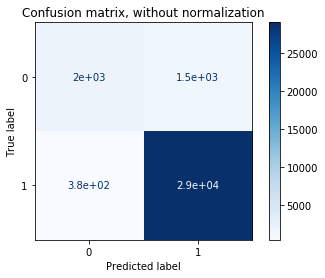

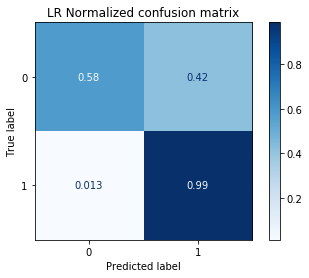

In [301]:
# Plot confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("LR Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(reg, loan_data_inputs_test, loan_data_targets_test,
                                 
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [302]:
y_hat_test = reg.predict(loan_data_inputs_test)
y_hat_test_proba = reg.predict_proba(loan_data_inputs_test)

#Predict_proba will give the only probability of 1.
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

loan_data_targets_test_temp = loan_data_targets_test

# We reset the index of a dataframe.
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

# Concatenates two dataframes.
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']
df_actual_predicted_probs.index = loan_data_inputs_test.index
df_actual_predicted_probs.head(100)

,loan_data_targets_test,y_hat_test_proba
133465,1,0.968988
467,1,0.958730
71374,1,0.957852
158442,1,0.983683
84776,1,0.993259
...,...,...
164281,1,0.996425
138419,1,0.957896
32397,1,0.930784
125865,1,0.962985


0.9396785399194713

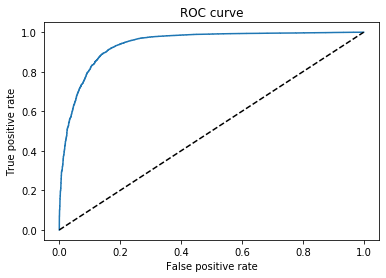

In [303]:
import matplotlib.pyplot as plt

tr = 0.9
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]



roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')


AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

AUROC

#AUC


###Scroe Card

In [304]:
df_ref_categories = pd.DataFrame(loan_data_inputs_train.columns, columns = ['Feature name'])
# We create a new dataframe with one column. Its values are the values from the 'reference_categories' list.
# We name it 'Feature name'.
df_ref_categories['Coefficients'] = 0
# We create a second column, called 'Coefficients', which contains only 0 values.

In [305]:
# Concatenates two dataframes with ref_cat
df_scorecard = pd.concat([summary_table, df_ref_categories])
# We reset the index of a dataframe.
df_scorecard = df_scorecard.reset_index()

df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]

In [306]:
min_score = 300
max_score = 850

min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the minimum values.
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()


df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
# We multiply the value of the 'Coefficients' column by the ration of the differences between
# maximum score and minimum score and maximum sum of coefficients and minimum sum of cefficients.

# We divide the difference of the value of the 'Coefficients' column and the minimum sum of coefficients by
# the difference of the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we multiply that by the difference between the maximum score and the minimum score.
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score

# We round the values of the 'Score - Calculation' column.
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()

max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()

df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']

df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
#df_scorecard['Score - Final'][77] = 16


# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()

max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()

df_scorecard.sort_values(by='Score - Final',ascending =False)

C:\Users\edwin\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,index,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,0.049561,Intercept,529.853134,530.0,0.146866,530.0
98,98,"amount_payed:(21516.911, 56809.052]",7.251113,amount_payed,97.792602,98.0,0.207398,98.0
97,97,"amount_payed:(14268.0, 21516.911]",4.108780,amount_payed,55.413332,55.0,-0.413332,55.0
4,4,"loan_amount:(999.999, 6300.0]",3.771464,loan_amount,50.864095,51.0,0.135905,51.0
65,65,delinquency_2y:19.0,3.438078,delinquency_2y,46.367866,46.0,-0.367866,46.0
...,...,...,...,...,...,...,...,...
6,6,"loan_amount:(14400.0, 20000.0]",-1.225637,loan_amount,-16.529633,-17.0,-0.470367,-17.0
63,63,delinquency_2y:17.0,-2.360048,delinquency_2y,-31.828938,-32.0,-0.171062,-32.0
7,7,"loan_amount:(20000.0, 35000.0]",-3.255317,loan_amount,-43.903041,-44.0,-0.096959,-44.0
95,95,"amount_payed:(-0.001, 5846.471]",-3.632565,amount_payed,-48.990823,-49.0,-0.009177,-49.0


In [307]:
inputs_test_with_ref_cat_w_intercept = loan_data_inputs_test

# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

# Here, from the 'inputs_test_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names,
# exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.
scorecard_scores = df_scorecard['Score - Final']
scorecard_scores = scorecard_scores.values.reshape(263, 1)
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

y_scores.head()

,0
133465,574.0
467,571.0
71374,572.0
158442,581.0
84776,595.0
